In [40]:
%pip install pandas scikit-learn mlxtend seaborn matplotlib scikit-learn-extra

  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp313-cp313-win_amd64.whl size=378544 sha256=78efb993379c8f175d886df4be4881fa5abc44bf15ef139fd4edb58f1e5aa9db
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\17\4b\b8\6b6711681d0981b110c9cc91ad6d1ebd88adf1547e1da301fc
Successfully built scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

In [31]:
df.to_csv('pre_processed_mall.csv')

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
print(f"Before Preprocessing: {df.head()}")
# label encoding gender
from sklearn.preprocessing import LabelEncoder
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])
# Normalization of number columns
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df[['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']])
df[['Age', 'Income', 'Score']] = scaled

print(f"After Preprocessing: {df.head()}")

Before Preprocessing:    CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score_(1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
After Preprocessing:    CustomerID  Genre       Age  Annual_Income_(k$)  Spending_Score_(1-100)  \
0           1      1 -1.424569                  15                      39   
1           2      1 -1.281035                  15                      81   
2           3      0 -1.352802                  16                       6   
3           4      0 -1.137502                  16                      77   
4           5      0 -0.563369                  17                      40   

     Income     Score  
0 -1.738999 -0.434801  
1 -1.738999  1

# Apriori Algorithm 

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

transactions = [
    ['milk', 'bread', 'nuts', 'apple'],
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'apple'],
    ['bread', 'apple']
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
   support       itemsets
0      0.6        (apple)
1      0.8        (bread)
2      0.8         (milk)
3      0.6  (milk, bread)

Association Rules:
  antecedents consequents  support  confidence    lift
0      (milk)     (bread)      0.6        0.75  0.9375
1     (bread)      (milk)      0.6        0.75  0.9375


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df = pd.read_csv("pre_processed_mall.csv")

df['Genre'] = df['Genre'].map({0: 'Female', 1: 'Male'})

transactions = df.apply(lambda row: [
    f"Gender={row['Genre']}", 
    f"Age_Group={row['Age_Group']}", 
    f"Income_Level={row['Income_Level']}"
], axis=1).tolist()


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.25, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
   support                           itemsets
0    0.330                    (Age_Group=Mid)
1    0.490                  (Age_Group=Young)
2    0.560                    (Gender=Female)
3    0.440                      (Gender=Male)
4    0.430                 (Income_Level=Low)
5    0.470                 (Income_Level=Med)
6    0.285   (Gender=Female, Age_Group=Young)
7    0.250  (Gender=Female, Income_Level=Low)

Association Rules:
          antecedents         consequents  support  confidence      lift
0     (Gender=Female)   (Age_Group=Young)    0.285    0.508929  1.038630
1   (Age_Group=Young)     (Gender=Female)    0.285    0.581633  1.038630
2     (Gender=Female)  (Income_Level=Low)    0.250    0.446429  1.038206
3  (Income_Level=Low)     (Gender=Female)    0.250    0.581395  1.038206


c:\Users\HP\miniconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


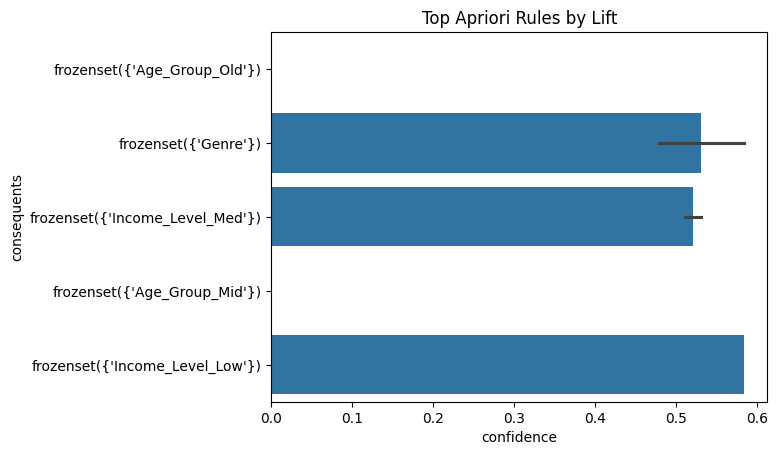

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

df['Age_Group'] = pd.cut(df['Age'], bins=3, labels=["Young", "Mid", "Old"])
df['Income_Level'] = pd.cut(df['Annual_Income_(k$)'], bins=3, labels=["Low", "Med", "High"])
basket = pd.get_dummies(df[['Genre', 'Age_Group', 'Income_Level']])
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values("confidence", ascending=False, inplace=True)

sns.barplot(x='confidence', y=rules['consequents'].astype(str), data=rules.head(5))
plt.title("Top Apriori Rules by Lift")
plt.show()


# FP Growth

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

df = pd.read_csv("pre_processed_mall.csv")

df['Genre'] = df['Genre'].map({0: 'Female', 1: 'Male'})

transactions = df.apply(lambda row: [
    f"Gender={row['Genre']}", 
    f"Age_Group={row['Age_Group']}", 
    f"Income_Level={row['Income_Level']}"
], axis=1).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_encoded, min_support=0.25, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
   support                           itemsets
0    0.490                  (Age_Group=Young)
1    0.440                      (Gender=Male)
2    0.430                 (Income_Level=Low)
3    0.560                    (Gender=Female)
4    0.330                    (Age_Group=Mid)
5    0.470                 (Income_Level=Med)
6    0.285   (Gender=Female, Age_Group=Young)
7    0.250  (Gender=Female, Income_Level=Low)

Association Rules:
          antecedents         consequents  support  confidence      lift
0     (Gender=Female)   (Age_Group=Young)    0.285    0.508929  1.038630
1   (Age_Group=Young)     (Gender=Female)    0.285    0.581633  1.038630
2     (Gender=Female)  (Income_Level=Low)    0.250    0.446429  1.038206
3  (Income_Level=Low)     (Gender=Female)    0.250    0.581395  1.038206


C:\Users\HP\miniconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


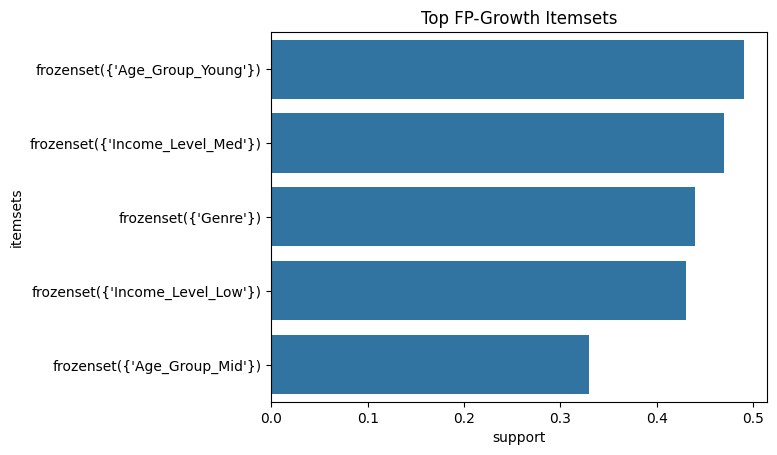

In [24]:
from mlxtend.frequent_patterns import fpgrowth
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

df['Age_Group'] = pd.cut(df['Age'], bins=3, labels=["Young", "Mid", "Old"])
df['Income_Level'] = pd.cut(df['Annual_Income_(k$)'], bins=3, labels=["Low", "Med", "High"])
basket = pd.get_dummies(df[['Genre', 'Age_Group', 'Income_Level']])

fp_itemsets = fpgrowth(basket, min_support=0.1, use_colnames=True)
fp_itemsets = fp_itemsets.sort_values(by='support', ascending=False).head(5)

sns.barplot(x='support', y=fp_itemsets['itemsets'].astype(str), data=fp_itemsets)
plt.title("Top FP-Growth Itemsets")
plt.show()


# Decision Tree

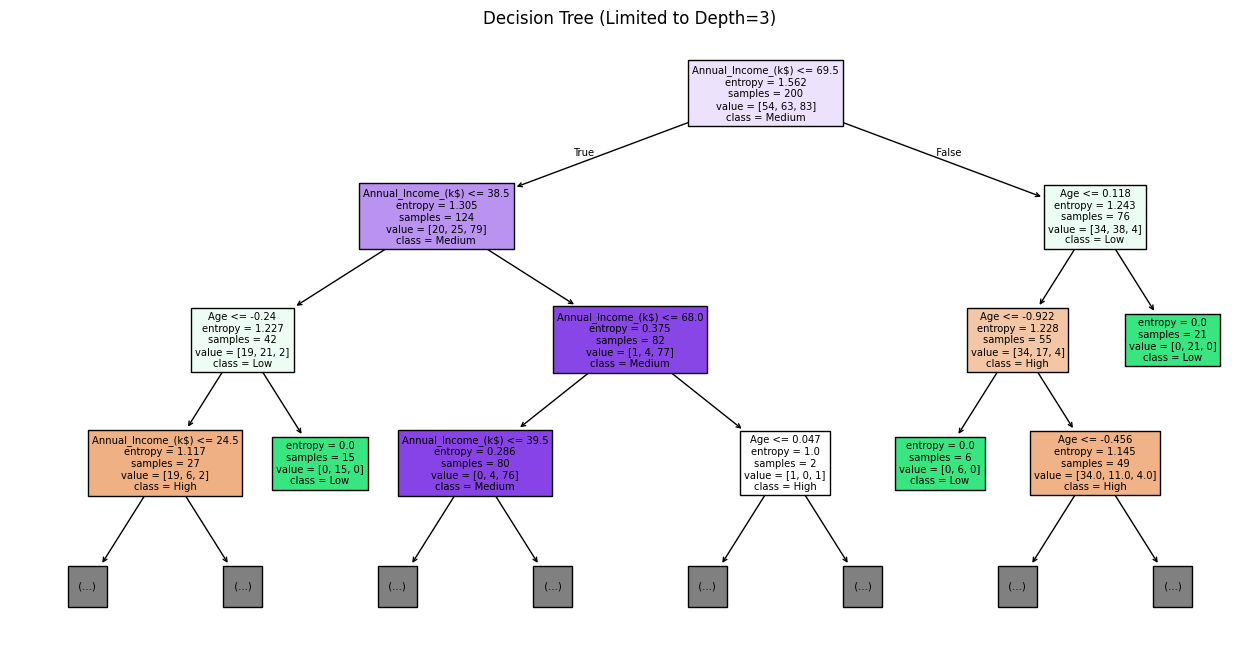

              precision    recall  f1-score   support

         Low       1.00      0.96      0.98        54
      Medium       0.97      1.00      0.98        63
        High       1.00      1.00      1.00        83

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

X = df[['Age', 'Annual_Income_(k$)']]
df['Spending_Class'] = pd.cut(df['Spending_Score_(1-100)'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])
y = df['Spending_Class']

tree = DecisionTreeClassifier(criterion='entropy').fit(X, y)

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True, max_depth=3)
plt.title("Decision Tree (Limited to Depth=3)")
plt.show()

y_pred = tree.predict(X)
print(classification_report(y, y_pred, target_names=["Low", "Medium", "High"]))

# Bayesian Classification

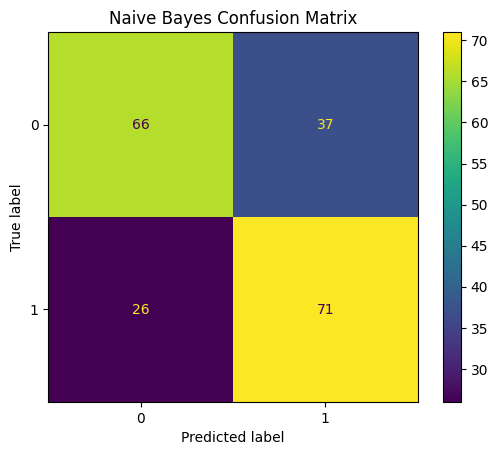

Classification Report:

              precision    recall  f1-score   support

 Low Spender       0.72      0.64      0.68       103
High Spender       0.66      0.73      0.69        97

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

X = df[['Age', 'Annual_Income_(k$)']]
y = (df['Spending_Score_(1-100)'] > 50).astype(int)

nb = GaussianNB().fit(X, y)
y_pred = nb.predict(X)

ConfusionMatrixDisplay.from_estimator(nb, X, y)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y, y_pred, target_names=["Low Spender", "High Spender"]))


# SVM

C:\Users\HP\AppData\Local\Temp\ipykernel_10208\441352405.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


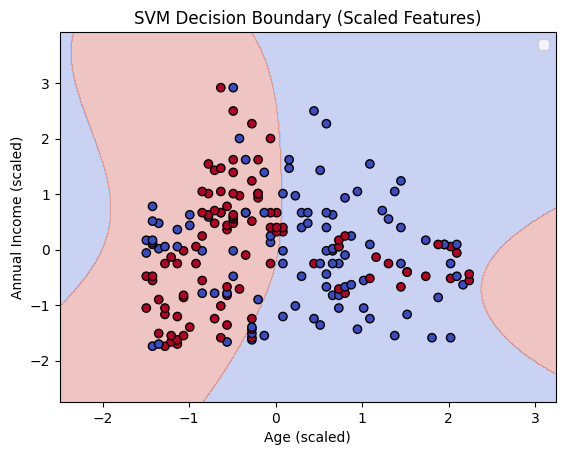

              precision    recall  f1-score   support

 Low Spender       0.76      0.66      0.70       103
High Spender       0.68      0.77      0.72        97

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

X = df[['Age', 'Annual_Income_(k$)']]
y = (df['Spending_Score_(1-100)'] > 50).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVC(C=10, gamma=0.1)
svm.fit(X_scaled, y)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')


plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.title("SVM Decision Boundary (Scaled Features)")
plt.legend()
plt.show()

y_pred = svm.predict(X_scaled)
print(classification_report(y, y_pred, target_names=["Low Spender", "High Spender"]))


# Linear Regression

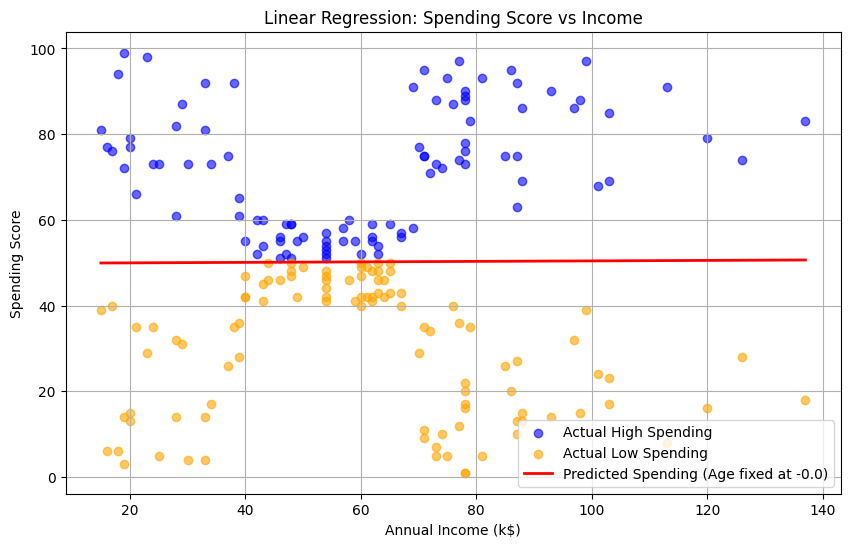

RMSE: 24.3403


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

X = df[['Age', 'Annual_Income_(k$)']]
y = df['Spending_Score_(1-100)']

reg = LinearRegression().fit(X, y)

age_fixed = np.mean(X['Age'])

income_range = np.linspace(X['Annual_Income_(k$)'].min(), X['Annual_Income_(k$)'].max(), 100)
X_pred = pd.DataFrame({'Age': age_fixed, 'Annual_Income_(k$)': income_range})
y_pred = reg.predict(X_pred)

actual_label = y > 50

plt.figure(figsize=(10,6))
plt.scatter(X['Annual_Income_(k$)'][actual_label], y[actual_label], 
            color='blue', label='Actual High Spending', alpha=0.6)
plt.scatter(X['Annual_Income_(k$)'][~actual_label], y[~actual_label], 
            color='orange', label='Actual Low Spending', alpha=0.6)

plt.plot(income_range, y_pred, color='red', linewidth=2, label=f'Predicted Spending (Age fixed at {age_fixed:.1f})')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Linear Regression: Spending Score vs Income')
plt.legend()
plt.grid(True)
plt.show()

y_pred = reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.4f}")


K-Means Centroids:
        Age     Income      Score
0  0.105870  44.154472  49.829268
1 -0.441917  86.538462  82.128205
2  0.110861  87.000000  18.631579


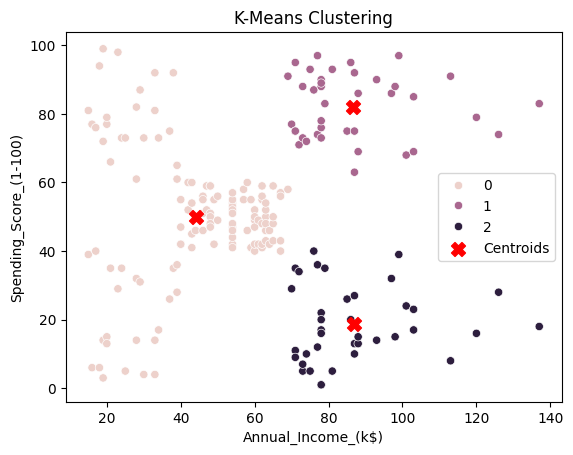

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']])
df['KMeans'] = kmeans.labels_

print("K-Means Centroids:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Income', 'Score']))

sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', hue='KMeans', data=df)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='red', marker='X', s=100, label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.show()


K-Medoids Medoids:
 [[-0.34806844 78.        ]
 [-0.27630176 28.        ]
 [ 0.44136514 54.        ]]


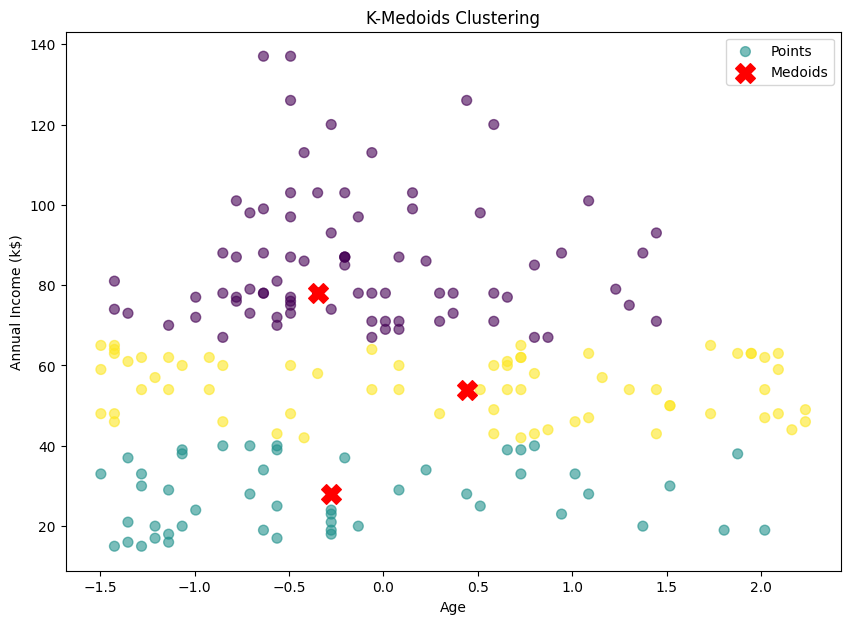

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

df = pd.read_csv("pre_processed_mall.csv")
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

X = df[['Age', 'Annual_Income_(k$)']].values

kmedoids = KMedoids(n_clusters=3, random_state=42).fit(X)

labels = kmedoids.labels_

medoids = kmedoids.cluster_centers_
print("K-Medoids Medoids:"+ "\n", medoids)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, label='Points')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, marker='X', label='Medoids')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()


Agglomerative Cluster Centroids (Mean of clusters):
Cluster 0:
Age                       -0.165891
Annual_Income_(k$)        86.538462
Spending_Score_(1-100)    50.884615
dtype: float64
Cluster 1:
Age                       -0.124107
Annual_Income_(k$)        29.551724
Spending_Score_(1-100)    49.689655
dtype: float64
Cluster 2:
Age                        0.314652
Annual_Income_(k$)        57.000000
Spending_Score_(1-100)    49.828125
dtype: float64


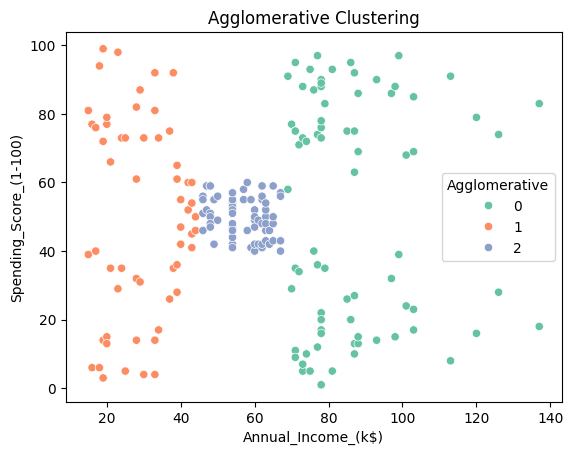

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
df['Agglomerative'] = agg.fit_predict(X)

print("Agglomerative Cluster Centroids (Mean of clusters):")
for i in range(3):
    cluster_points = df[df['Agglomerative'] == i][['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']]
    print(f"Cluster {i}:")
    print(cluster_points.mean())

sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', hue='Agglomerative', data=df, palette='Set2')
plt.title("Agglomerative Clustering")
plt.show()


DBSCAN labels: {np.int64(0), np.int64(1), np.int64(-1)}
DBSCAN
 0    137
 1     35
-1     28
Name: count, dtype: int64
Cluster 0 mean:
Age                        0.152203
Annual_Income_(k$)        51.613139
Spending_Score_(1-100)    45.335766
dtype: float64

Cluster 1 mean:
Age                       -0.438289
Annual_Income_(k$)        82.542857
Spending_Score_(1-100)    82.800000
dtype: float64



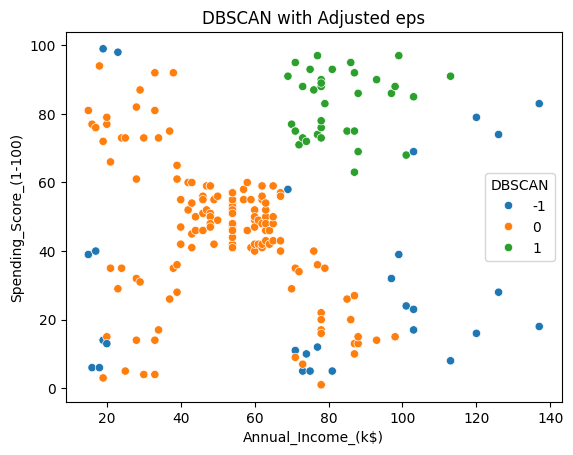

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

X_scaled = StandardScaler().fit_transform(df[['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']])

db = DBSCAN(eps=0.6, min_samples=5).fit(X_scaled)
df['DBSCAN'] = db.labels_

print("DBSCAN labels:", set(db.labels_))

print(df['DBSCAN'].value_counts())

for label in sorted(set(db.labels_)):
    if label == -1:
        continue
    group = df[df['DBSCAN'] == label][['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']]
    print(f"Cluster {label} mean:\n{group.mean()}\n")

sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', hue='DBSCAN', data=df, palette='tab10')
plt.title("DBSCAN with Adjusted eps")
plt.show()


In [47]:
for eps_val in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    db = DBSCAN(eps=eps_val, min_samples=5).fit(X_scaled)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps_val:.1f} → clusters: {n_clusters}, noise: {list(labels).count(-1)}")


eps=0.3 → clusters: 10, noise: 134
eps=0.4 → clusters: 6, noise: 98
eps=0.5 → clusters: 6, noise: 60
eps=0.6 → clusters: 2, noise: 28
eps=0.7 → clusters: 1, noise: 14
eps=0.8 → clusters: 1, noise: 6
eps=0.9 → clusters: 1, noise: 3
